# 1.Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd

# 2.Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [404]:
df=pd.read_csv(r"C:\Users\shank\Downloads\Apps_data+(1) (4).csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [405]:
df.shape

(10841, 13)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3.Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [407]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# All the categorical data summary statistics.

In [408]:
df.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [409]:
print('List out the columns that need to be worked upon for model building.')
print('1. Category')
print('2. Rating')
print('3. Reviews')
print('4. Size')
print('5. Installs')
print('6. Type')

List out the columns that need to be worked upon for model building.
1. Category
2. Rating
3. Reviews
4. Size
5. Installs
6. Type


# 4.Check if there are any duplicate records in the dataset? if any drop them.

In [410]:
duplicates=df[df.duplicated()]

In [411]:
duplicates.shape

(483, 13)

In [412]:
df.drop_duplicates(inplace=True)

In [413]:
df.shape

(10358, 13)

# 5.Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [414]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [415]:
invalid=df[df["Category"]=="1.9"].index

In [416]:
invalid

Int64Index([10472], dtype='int64')

In [417]:
df.drop(invalid,inplace=True)

In [418]:
df.shape

(10357, 13)

In [419]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# 6.Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [420]:
df["Rating"].isna().sum()

1465

In [421]:
nan_val=df[df['Rating'].isna()].index

In [422]:
nan_val

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1465)

In [423]:
df.drop(nan_val,inplace=True)

In [424]:
df.shape

(8892, 13)

In [425]:
df['Rating_category']=df.Rating.apply(lambda x:"high" if x>3.5 else "low")

In [426]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


# 7.Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

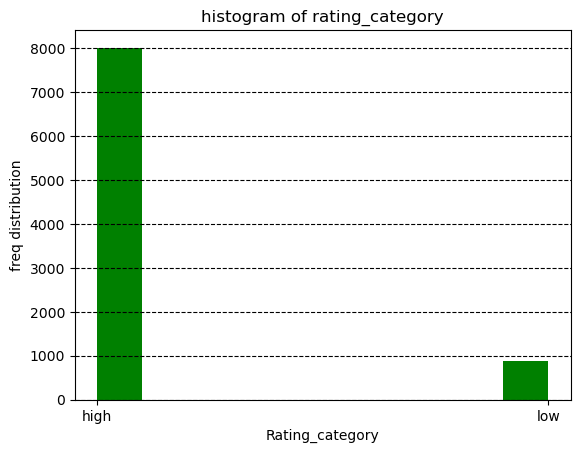

In [428]:
plt.hist(df['Rating_category'],color="green")
plt.xlabel('Rating_category')
plt.ylabel('freq distribution')
plt.grid(axis='y',linestyle='--',color='black')
plt.title('histogram of rating_category')
plt.show()

In this hist plot rating_category column has maximum count of high rating and minimum count of rating.
There are 8012 apps under the high rating category and 880 apps under the low rating category.

In [429]:
df['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

# 8.Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [430]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [431]:
df['Reviews']=df['Reviews'].astype(int)

In [432]:
df['Reviews'].dtypes

dtype('int32')

<Axes: xlabel='Reviews'>

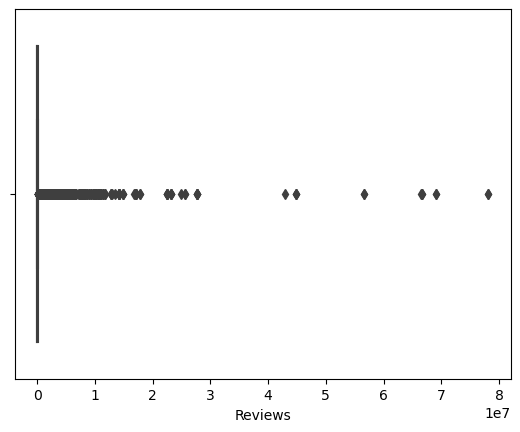

In [433]:
sns.boxplot(df,x="Reviews")

In [434]:
Q1=df['Reviews'].quantile(0.25)
Q3=df['Reviews'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

71102.75


In [435]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [436]:
outlier=df[(df['Reviews']<lower_bound) | (df['Reviews']>upper_bound)]

In [437]:
avg_val=df['Reviews'].mean()

In [438]:
df.loc[outlier.index,"Reviews"]=avg_val

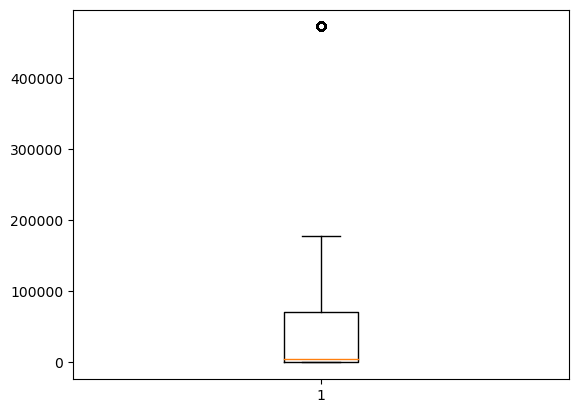

In [439]:
plt.boxplot(df["Reviews"])
plt.show()

# 9.The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [440]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [441]:
# Replace M with 1 million and K with 1 thousand

In [442]:
df['Size']=df['Size'].str.replace('M','000000')

In [443]:
df['Size']=df['Size'].str.replace('k','000')

In [444]:
# drop the entries where size='Varies with device')
var=df[df['Size']=='Varies with device'].index

In [445]:
var

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1468)

In [446]:
df.drop(var,inplace=True)

In [447]:
df.shape

(7424, 14)

In [448]:
# convert the column 'Size' into suitable data type
df['Size']=df['Size'].astype('float')

In [449]:
df['Size'].dtypes

dtype('float64')

# 10.Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [450]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [451]:
# Remove unwanted character from column 'Installs'
df['Installs']=df['Installs'].str.replace(",","")

In [452]:
df['Installs']=df['Installs'].str.replace("+","")

C:\Users\shank\AppData\Local\Temp\ipykernel_16812\389258223.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace("+","")


In [453]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [454]:
# convert the column into a suitable data type.
df['Installs']=df['Installs'].astype('int')

In [455]:
df['Installs'].dtypes

dtype('int32')

# 11.Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [456]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [457]:
# column 'Price' , remove the unwanted characters.
df['Price']=df['Price'].str.replace("$","")

C:\Users\shank\AppData\Local\Temp\ipykernel_16812\1676360116.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace("$","")


In [458]:
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [459]:
# convert the column 'Price' into a suitable data type.
df['Price']=df['Price'].astype('float')

In [460]:
df['Price'].dtypes

dtype('float64')

# 12.Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [462]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [463]:
drop_col=df[['App','Rating','Genres','Last Updated','Current Ver','Android Ver']]

In [464]:
df.drop(drop_col,axis=1,inplace=True)

In [465]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159.000000,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,967.000000,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,87510.000000,8.7,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,472776.367184,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,967.000000,2.8,100000,Free,0.0,Everyone,high


# 13.Encode the categorical columns.

In [347]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [351]:
#OnhotEncode column "Category"
df=pd.get_dummies(df,prefix="Cat",columns=["Category"])

In [353]:
df.head(2)

,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,159.0,19000000.0,10000,Free,0.0,Everyone,high,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967.0,14000000.0,500000,Free,0.0,Everyone,high,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
#LabelEncode column "Type"
label=df.Type.unique()
lab=list(range(1,len(label)+1))
dict_map=dict(zip(label,lab))
df['Type_col']=df.Type.map(dict_map)

In [357]:
df.drop('Type',axis=1,inplace=True)

In [358]:
df.head(2)

,Reviews,Size,Installs,Price,Content Rating,Rating_category,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,...,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER,Type_col
0,159.0,19000000.0,10000,0.0,Everyone,high,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,967.0,14000000.0,500000,0.0,Everyone,high,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [359]:
df['Type_col'].dtypes

dtype('int64')

In [360]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [361]:
#OnehotEncode column "Content Rating"
df=pd.get_dummies(df,prefix="Cont_rat",columns=['Content Rating'])  

In [362]:
df.head(2)

,Reviews,Size,Installs,Price,Rating_category,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,...,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER,Type_col,Cont_rat_Adults only 18+,Cont_rat_Everyone,Cont_rat_Everyone 10+,Cont_rat_Mature 17+,Cont_rat_Teen,Cont_rat_Unrated
0,159.0,19000000.0,10000,0.0,high,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,967.0,14000000.0,500000,0.0,high,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [364]:
#LabelEncode column "Ra"
la=df.Rating_category.unique()
lb=list(range(1,len(la) +1))
lc=dict(zip(la,lb))
df['Rating_cat']=df.Rating_category.map(lc)

In [365]:
df.drop("Rating_category",axis=1,inplace=True)

In [366]:
df.head(2)

,Reviews,Size,Installs,Price,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,...,Cat_VIDEO_PLAYERS,Cat_WEATHER,Type_col,Cont_rat_Adults only 18+,Cont_rat_Everyone,Cont_rat_Everyone 10+,Cont_rat_Mature 17+,Cont_rat_Teen,Cont_rat_Unrated,Rating_cat
0,159.0,19000000.0,10000,0.0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,967.0,14000000.0,500000,0.0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [367]:
df['Rating_cat'].dtypes

dtype('int64')

# 14.Segregate the target and independent features (Hint: Use Rating_category as the target)

In [368]:
# x independent variables
x=df.drop('Rating_cat',axis=1)

# y dependent variable
y=df[['Rating_cat']]

In [369]:
x.head(5)

,Reviews,Size,Installs,Price,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,...,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER,Type_col,Cont_rat_Adults only 18+,Cont_rat_Everyone,Cont_rat_Everyone 10+,Cont_rat_Mature 17+,Cont_rat_Teen,Cont_rat_Unrated
0,159.000000,19000000.0,10000,0.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,967.000000,14000000.0,500000,0.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,87510.000000,8.7,5000000,0.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,472776.367184,25000000.0,50000000,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,967.000000,2.8,100000,0.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [370]:
y.head(5)

,Rating_cat
0,1
1,1
2,1
3,1
4,1


# 15.Split the dataset into train and test.

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [373]:
x_train.head(5)

,Reviews,Size,Installs,Price,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,...,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER,Type_col,Cont_rat_Adults only 18+,Cont_rat_Everyone,Cont_rat_Everyone 10+,Cont_rat_Mature 17+,Cont_rat_Teen,Cont_rat_Unrated
8888,1.000000,2.9,100,0.00,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1298,472776.367184,57000000.0,5000000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6599,309.000000,5.9,10000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7328,213.000000,6.1,5000,3.99,0,0,0,0,0,0,...,1,0,0,2,0,1,0,0,0,0
5681,57.000000,5.8,10000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [374]:
x_test.head(5)

,Reviews,Size,Installs,Price,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,...,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER,Type_col,Cont_rat_Adults only 18+,Cont_rat_Everyone,Cont_rat_Everyone 10+,Cont_rat_Mature 17+,Cont_rat_Teen,Cont_rat_Unrated
5708,701.0,7.3,100000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7215,363.0,14000000.0,1000,2.99,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
1350,71269.0,49000000.0,1000000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5727,78629.0,6.3,1000000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5326,9952.0,3.7,100000,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [375]:
y_train.head(5)

,Rating_cat
8888,1
1298,1
6599,1
7328,1
5681,1


In [376]:
y_train.head(5)

,Rating_cat
8888,1
1298,1
6599,1
7328,1
5681,1


# 16.Standardize the data, so that the values are within a particular range.

In [380]:
from sklearn.preprocessing import StandardScaler

In [391]:
stand_scl=StandardScaler()
df=stand_scl.fit_transform(df)
df=pd.DataFrame(df)

In [394]:
df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.470787,-0.074223,-0.168764,-0.063058,11.172757,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
1,-0.465493,-0.274991,-0.158181,-0.063058,11.172757,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
2,0.101551,-0.837140,-0.060990,-0.063058,11.172757,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
3,2.625877,0.166698,0.910911,-0.063058,11.172757,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,-2.015966,-0.204853,-0.216364,2.814796,-0.011607,-0.35358
4,-0.465493,-0.837140,-0.166820,-0.063058,11.172757,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,-0.471541,-0.812285,-0.168958,-0.063058,-0.089503,-0.092513,-0.070773,7.135551,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
7420,-0.471783,-0.837140,-0.168969,-0.063058,-0.089503,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
7421,-0.471580,1.290997,-0.168872,-0.063058,-0.089503,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
7422,-0.471803,-0.837140,-0.168977,-0.063058,-0.089503,-0.092513,-0.070773,-0.140143,-0.176789,-0.081511,...,-0.125988,-0.083169,-0.282029,-0.016416,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,-0.35358
